In [6]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

### Model 2 and 3:

Model will evaluate impact on Sale Price of:
- Total sqft (feature engineering)
- Condition
- Quality
- Interaction of Condition/Quality (feature engineering)
- Zone
- Neighborhood

#### Feature Engineering

**Total Square Feet (Total_SF)**

**1st assumption:** house price is dependent on the total sqft feet of the house. This will be calculated as the sum of:
- Basement SF
- 1st Floor SF
- 2nd Floor SF
- Garage Area

In [7]:
#Variable 1 --> total square footage proxy
%store -r df_no_na
df_no_na["Total_SF"] = df_no_na[["Total Bsmt SF", "1st Flr SF", "2nd Flr SF", "Garage Area"]].sum(axis=1) 

In [8]:
#repeat for test data
%store -r df_test_no_na
df_test_no_na["Total_SF"] = df_test_no_na[["Total Bsmt SF", "1st Flr SF", "2nd Flr SF", "Garage Area"]].sum(axis=1) 


<br>

**Interaction of Condition/Quality (Qual_cond)**

**2nd assumption:** while quality matters and so does house condition, there's an interaction effect (i.e. just because a house is high quality, doesn't mean it's in good condition, and vice versa)

In [9]:
#Variable 2 --> overall quality and condition of the house
df_no_na["Qual_cond"] = df_no_na["Overall Qual"] * df_no_na["Overall Cond"]

In [10]:
#repeat for test data
df_test_no_na["Qual_cond"] = df_test_no_na["Overall Qual"] * df_test_no_na["Overall Cond"]


<br>

**Zone Dummy (zone_< >)**

**3rd assumption:** Zoning is a categorical variable, so let's create some dummy columns
<br>\[In future models, this will be done with One Hot Encoder\]

In [11]:
#Variable 3 --> Zoning dummy
df_no_na_dummy = pd.get_dummies(df_no_na, columns = ["MS Zoning"], prefix_sep = "_", prefix = "zone", drop_first = True)

In [12]:
#repeat for test data
df_test_no_na_dummy = pd.get_dummies(df_test_no_na, columns = ["MS Zoning"], prefix_sep = "_", prefix = "zone", drop_first = True)


<br>

**Neighborhood Dummy (area_< >)**

**4th assumption:** Neighborhood is a categorical variable, so let's creat some dummy columns
<br>\[In future models, this will be done with One Hot Encoder\]

In [13]:
#Variable 4 --> Neighborhood dummy
df_no_na_dummy_final = pd.get_dummies(df_no_na_dummy, columns = ["Neighborhood"], prefix_sep = "_", prefix = "area", drop_first = True)

In [14]:
#repeat for test daata
df_test_no_na_dummy_final = pd.get_dummies(df_test_no_na_dummy, columns = ["Neighborhood"], prefix_sep = "_", prefix = "area", drop_first = True)

Looking at the relationships between the feature engineered terms and Sale Price:
* Price has a strong seemingly linear relationship wih Total Square Feet. Interestingly, higher quality/condition houses are hard to come by, and do not have a clear relationship with Sale Price.
* We see a that some neighborhoods have a higher Sale Price than others, which indicates that location does impact price in some way.

**Note:**
* No outliers were removed.

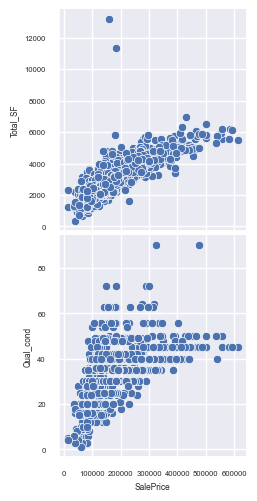

In [15]:
sns.set(font_scale=0.5)
sns.pairplot(df_no_na, y_vars=['Total_SF', 'Qual_cond'], x_vars=['SalePrice']);

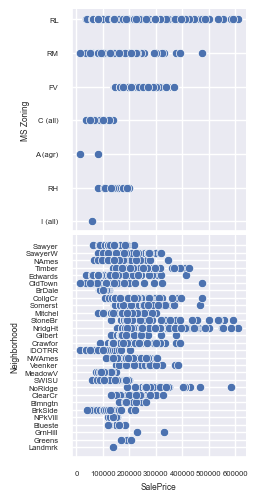

In [16]:
sns.set(font_scale=0.5)
sns.pairplot(df_no_na, y_vars=['MS Zoning', 'Neighborhood'], x_vars=['SalePrice']);

### Model - Linear Regression

In [17]:
#Columns to keep
features_2 = ['Total_SF',
 'Qual_cond',
'Overall Cond',
'Overall Qual',
'zone_C (all)',
 'zone_FV',
 'zone_I (all)',
 'zone_RH',
 'zone_RL',
 'zone_RM',
 'area_Blueste',
 'area_BrDale',
 'area_BrkSide',
 'area_ClearCr',
 'area_CollgCr',
 'area_Crawfor',
 'area_Edwards',
 'area_Gilbert',
 'area_Greens',
 'area_GrnHill',
 'area_IDOTRR',
 'area_Landmrk',
 'area_MeadowV',
 'area_Mitchel',
 'area_NAmes',
 'area_NPkVill',
 'area_NWAmes',
 'area_NoRidge',
 'area_NridgHt',
 'area_OldTown',
 'area_SWISU',
 'area_Sawyer',
 'area_SawyerW',
 'area_Somerst',
 'area_StoneBr',
 'area_Timber',
 'area_Veenker']
X_2 = df_no_na_dummy_final[features_2]
y = df_no_na_dummy_final["SalePrice"]

In [18]:
df_test_no_na_dummy_final["zone_C (all)"]=0
df_test_no_na_dummy_final["area_GrnHill"]=0
df_test_no_na_dummy_final["area_Landmrk"]=0
#3 dummy columns do not exist in our test file, that were inserted to apply train data

In [19]:
X_2_to_test = df_test_no_na_dummy_final[features_2]

In [20]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y, random_state=42)

In [21]:
ss = StandardScaler()
#ss.fit(X_train)
X2_train = ss.fit_transform(X2_train)
X2_test = ss.transform(X2_test)

In [22]:
X_2_to_test = ss.transform(X_2_to_test)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X2_train,y2_train)

LinearRegression()

In [25]:
y2_pred = lr.predict(X2_test) #validate model

In [26]:
rmse_2 = np.sqrt(mean_squared_error(y2_test, y2_pred))

In [28]:
print(f"train_data r^2: {lr.score(X2_train,y2_train)}.")
print(f"validation_data r^2: {lr.score(X2_test, y2_test)}.")
print(f"root mean squared error: {rmse_2}.")

train_data r^2: 0.8141962050633593.
validation_data r^2: 0.8464740470903601.
root mean squared error: 31247.739596366788.


**Note:**
* The model seems to be underfitting (performing better with test data than with train data)

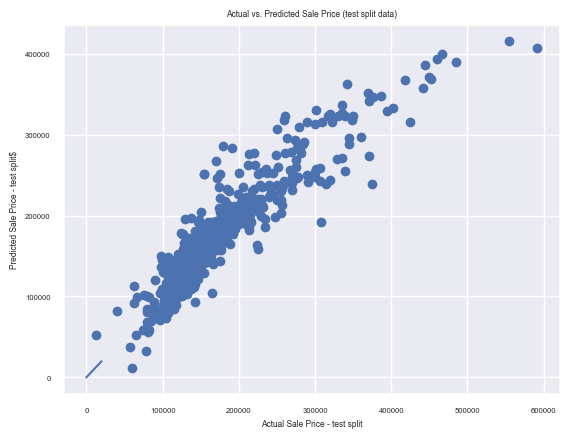

In [29]:
plt.scatter(y2_test, y2_pred)
plt.plot(range(20000), range(20000))

plt.xlabel("Actual Sale Price - test split")
plt.ylabel("Predicted Sale Price - test split$")
plt.title("Actual vs. Predicted Sale Price (test split data)")

plt.show()

### Model Validation

In [31]:
lasso = LassoCV(n_alphas=200)

In [32]:
lasso.fit(X2_train, y2_train)

lasso_scores = cross_val_score(lasso, X2_train, y2_train, cv = 5)
lasso_scores.mean()

0.7899736561771653

Lasso regularization generalizes the model further, and has a much weaker fit than a Linear Regression.

In [40]:
print('R2 training data', round(lasso.score(X2_train, y2_train), 2))
print('R2 test data', round(lasso.score(X2_test, y2_test), 2))
pred_train2_best = lasso.predict(X2_train)
mse_train2_best = mean_squared_error(y2_train, pred_train2_best)
print('RMSE training data', round(mse_train2_best**0.5, 2))

# Test data
pred2_best = lasso.predict(X2_test)
mse_test2_best = mean_squared_error(y2_test, pred2_best)
print('RMSE test data', round(mse_test2_best**0.5, 2))

R2 training data 0.81
R2 test data 0.85
RMSE training data 34152.68
RMSE test data 31042.89


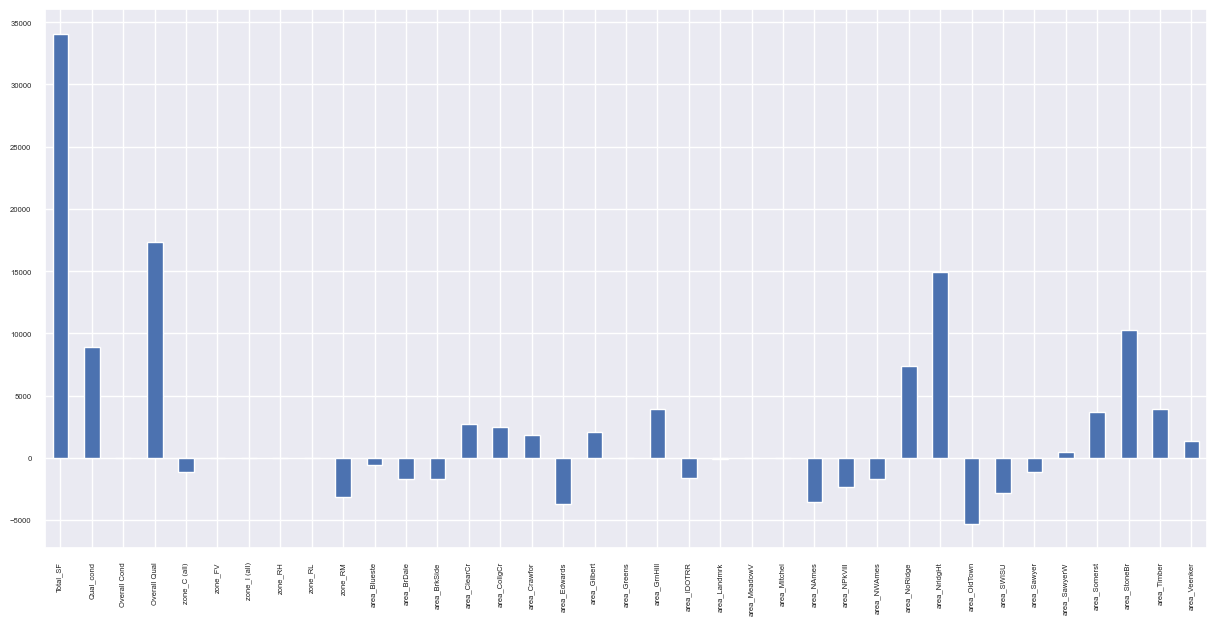

In [33]:
pd.Series(lasso.coef_, index=features_2).plot.bar(figsize = (15, 7));


**Note:**
* Overall Condition of the house has no impact on the price, which is surprising. 
* Likewise, a house being in the RM (Residential Medium) zone has a negative impact on price.
* Price increases and decreases are impacted by neighborhood (which I will explore at the end of this notebook).

In [34]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [35]:
ridge_scores = cross_val_score(ridge, X2_train, y2_train, cv = 5)
ridge_scores.mean()

0.7898080876406318

There were two versions of the model submitted to Kaggle, both Linear Regression models. Submission 2 was NOT scaled, while Submission 3 was.

In [38]:
%store -r df_test
submission3 = pd.DataFrame(df_test, columns=["Id"])
submission3["SalePrice"] = lr.predict(X_2_to_test)

In [39]:
submission3.to_csv('./datasets/submission3.csv', index=False)